# Imports

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL

# Data loading and preprocessing

In [183]:
events = pd.read_csv("../data/events_full.csv", parse_dates=True)
counters = pd.read_csv("../data/counters_train.csv", parse_dates=True)
counters_test = pd.read_csv("../data/counters_test.csv", parse_dates=True)

In [184]:
counters_in = counters[counters.direction == 'in'][['dt', 'cnt']]
counters_out = counters[counters.direction == 'out'][['dt', 'cnt']]
counters_in['dt'] = counters_in.dt.apply(pd.to_datetime)
counters_out['dt'] = counters_out.dt.apply(pd.to_datetime)
counters_in = counters_in.set_index('dt')
counters_out = counters_out.set_index('dt')

In [185]:
counters_in

,cnt
dt,
2005-07-24 00:00:00,0
2005-07-24 00:30:00,0
2005-07-24 01:00:00,0
2005-07-24 01:30:00,0
2005-07-24 02:00:00,0
...,...
2005-10-05 21:30:00,0
2005-10-05 22:00:00,0
2005-10-05 22:30:00,160


In [186]:
counters_out

,cnt
dt,
2005-07-24 00:00:00,0
2005-07-24 00:30:00,11
2005-07-24 01:00:00,0
2005-07-24 01:30:00,0
2005-07-24 02:00:00,0
...,...
2005-10-05 21:30:00,0
2005-10-05 22:00:00,486
2005-10-05 22:30:00,154


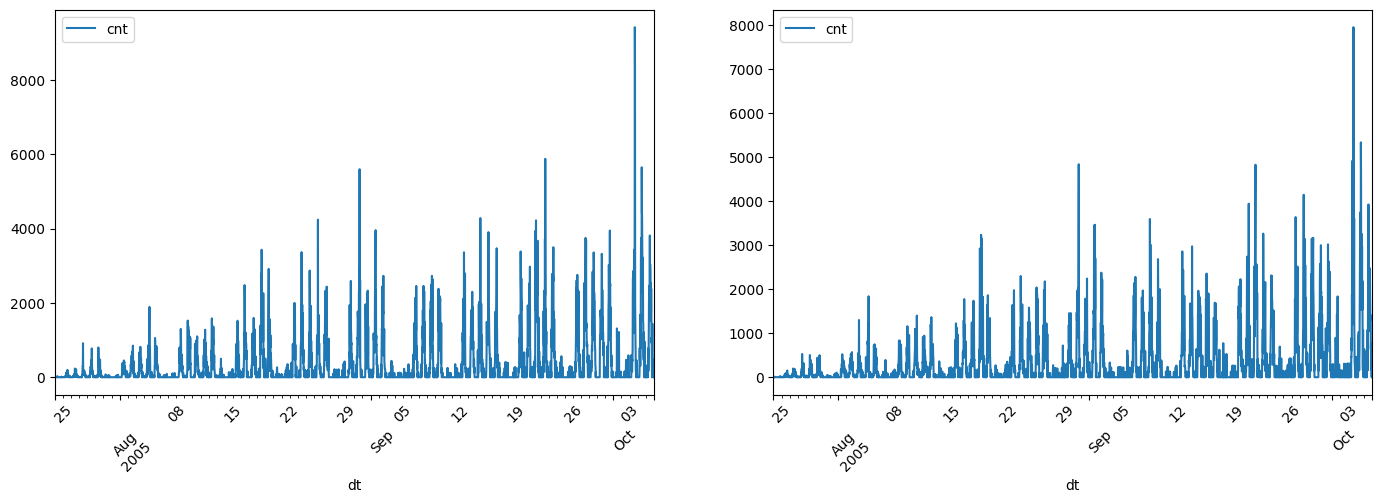

In [187]:
fig, ax = plt.subplots(1,2, figsize=(17, 5))
counters_in.plot(rot=45, ax=ax[0])
counters_out.plot(rot=45, ax=ax[1])
plt.show()

<AxesSubplot: xlabel='cnt', ylabel='Count'>

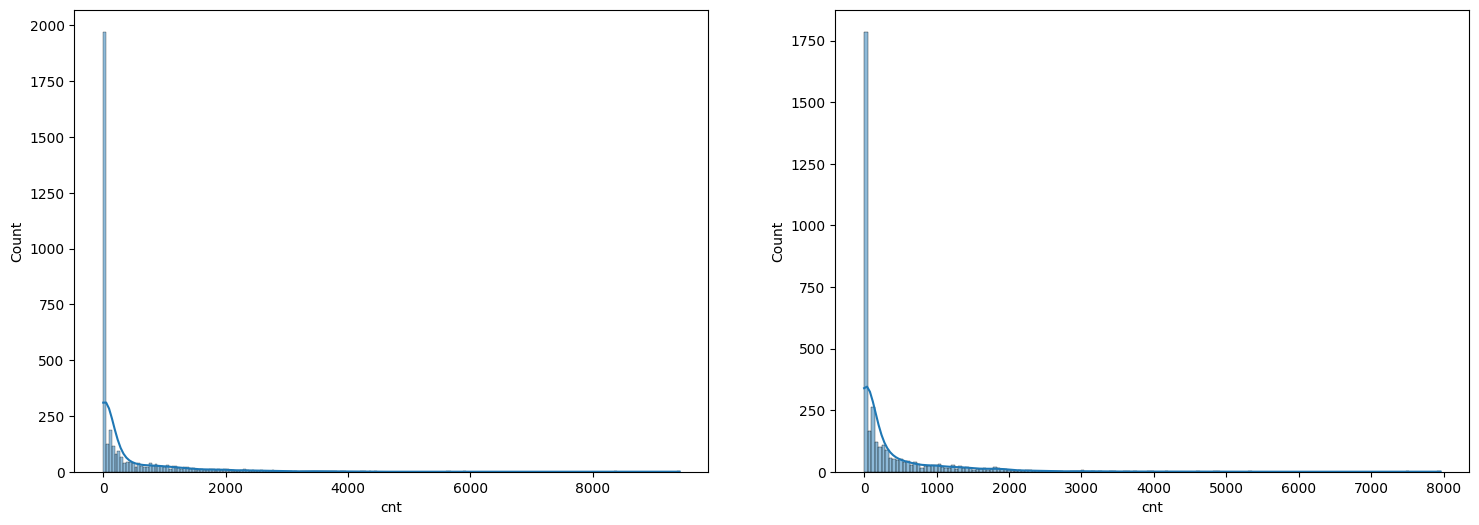

In [188]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.histplot(counters_in.cnt, kde=True, ax=ax[0])
sns.histplot(counters_out.cnt, kde=True, ax=ax[1])

In [189]:
counters_in['cnt'] = counters_in['cnt'].apply(lambda x: x + 1)
counters_out['cnt'] = counters_out['cnt'].apply(lambda x: x + 1)
counters_in = counters_in.asfreq(freq='30min')
counters_out = counters_out.asfreq(freq='30min')

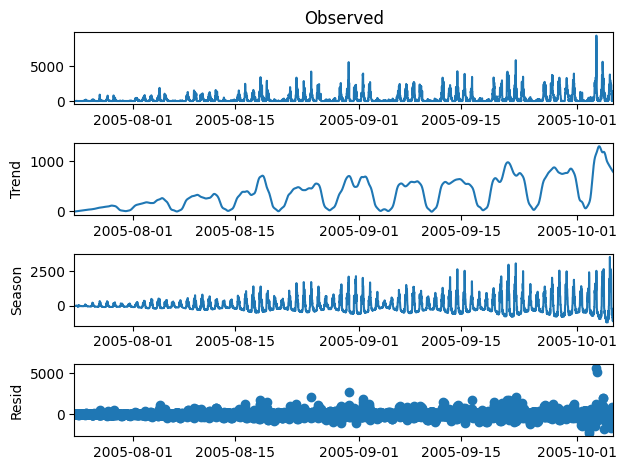

In [190]:
stl_res = STL(counters_in, period=24*2).fit()
stl_res.plot();

In [191]:
print(counters_in.index)

DatetimeIndex(['2005-07-24 00:00:00', '2005-07-24 00:30:00',
               '2005-07-24 01:00:00', '2005-07-24 01:30:00',
               '2005-07-24 02:00:00', '2005-07-24 02:30:00',
               '2005-07-24 03:00:00', '2005-07-24 03:30:00',
               '2005-07-24 04:00:00', '2005-07-24 04:30:00',
               ...
               '2005-10-05 19:00:00', '2005-10-05 19:30:00',
               '2005-10-05 20:00:00', '2005-10-05 20:30:00',
               '2005-10-05 21:00:00', '2005-10-05 21:30:00',
               '2005-10-05 22:00:00', '2005-10-05 22:30:00',
               '2005-10-05 23:00:00', '2005-10-05 23:30:00'],
              dtype='datetime64[ns]', name='dt', length=3552, freq='30T')


In [192]:
counters_in

,cnt
dt,
2005-07-24 00:00:00,1
2005-07-24 00:30:00,1
2005-07-24 01:00:00,1
2005-07-24 01:30:00,1
2005-07-24 02:00:00,1
...,...
2005-10-05 21:30:00,1
2005-10-05 22:00:00,1
2005-10-05 22:30:00,161


In [193]:
model=SARIMAX(counters_in.cnt,order=(1,1,1))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48725D+00    |proj g|=  6.73455D-03

At iterate    5    f=  7.48721D+00    |proj g|=  8.89997D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.305D-05   7.487D+00
  F =   7.4872134502100822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [200]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    cnt   No. Observations:                 3552
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -26594.582
Date:                Thu, 20 Oct 2022   AIC                          53195.164
Time:                        14:58:40   BIC                          53213.689
Sample:                    07-24-2005   HQIC                         53201.771
                         - 10-05-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1014      0.012      8.219      0.000       0.077       0.126
ma.L1         -0.4967      0.010    -48.544      0.000      -0.517      -0.477
sigma2      1.884e+05   1171.237    160.867      0.000    1.86e+05    1.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            148050.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              10.41   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
counters_test_in = counters_test[counters_test.direction == 'in'][['dt', 'cnt']]
counters_test_out = counters_test[counters_test.direction == 'out'][['dt', 'cnt']]
counters_test_in['dt'] = counters_test_in.dt.apply(pd.to_datetime)
counters_test_out['dt'] = counters_test_out.dt.apply(pd.to_datetime)
counters_test_in = counters_test_in.set_index('dt')
counters_test_out = counters_test_out.set_index('dt')

In [199]:
counters_test_in['cnt'] = counters_test_in['cnt'].apply(lambda x: x + 1)
counters_test_out['cnt'] = counters_test_out['cnt'].apply(lambda x: x + 1)
counters_test_in = counters_test_in.asfreq(freq='30min')
counters_test_out = counters_test_out.asfreq(freq='30min')

In [201]:
counters_test_in

,cnt
dt,
2005-10-06 00:00:00,1
2005-10-06 00:30:00,1
2005-10-06 01:00:00,1
2005-10-06 01:30:00,1
2005-10-06 02:00:00,1
...,...
2005-11-05 21:30:00,1
2005-11-05 22:00:00,1
2005-11-05 22:30:00,1
